In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\M RAJESH\Downloads\data-training.csv')
df

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0000001,0,1,1,1,0,1,0,0,0,9,9,9,0,0,2
1,RE-TRAIN-0000002,0,1,1,1,0,1,0,0,0,9,9,9,0,0,4
2,RE-TRAIN-0000003,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1
3,RE-TRAIN-0000004,0,1,1,1,0,1,0,1,0,9,9,9,0,0,1
4,RE-TRAIN-0000005,0,1,1,1,0,1,1,0,0,0,9,9,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196457,RE-TRAIN-0196458,9,4,9,9,9,9,9,9,9,0,9,9,0,1,5
196458,RE-TRAIN-0196459,9,4,9,9,9,9,9,9,9,1,9,9,0,0,68
196459,RE-TRAIN-0196460,9,4,9,9,9,9,9,9,9,9,9,9,0,0,378
196460,RE-TRAIN-0196461,9,4,9,9,9,9,9,9,9,9,9,9,0,0,1132


In [3]:
df.shape

(196462, 16)

In [4]:
df.isnull().sum()

id          0
menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
cancer      0
count       0
dtype: int64

In [5]:
df.columns

Index(['id', 'menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi',
       'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt',
       'invasive', 'cancer', 'count'],
      dtype='object')

In [6]:
col_replace=['menopaus', 'density', 'race', 'Hispanic', 'bmi','agefirst', 
             'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']
for i in col_replace:
    df[i].replace({9:np.nan},inplace=True)

In [7]:
df.isnull().sum()

id              0
menopaus    11043
agegrp          0
density     49730
race        40451
Hispanic    59899
bmi         76505
agefirst    64061
nrelbc      27786
brstproc    25377
lastmamm    65061
surgmeno    84860
hrt         65734
invasive        0
cancer          0
count           0
dtype: int64

In [8]:
# df1=df[df.isna().sum(axis=1)<8]
# df1

In [9]:
df.drop(['id','count'],axis=1,inplace=True)

In [10]:
for i in df.columns:
    print(f'{i} : {(df[i].isnull().sum())/df.shape[0]}')

menopaus : 0.05620934328267044
agegrp : 0.0
density : 0.25312783133633987
race : 0.20589732365546518
Hispanic : 0.3048884771609777
bmi : 0.38941372886359704
agefirst : 0.3260732355366432
nrelbc : 0.14143193085685782
brstproc : 0.12917001761154828
lastmamm : 0.3311632783948041
surgmeno : 0.4319410369435311
hrt : 0.33458887723834635
invasive : 0.0
cancer : 0.0


In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [12]:
imp.fit(df)

IterativeImputer(random_state=0)

In [13]:
df_array=np.round(imp.transform(df),2)

In [14]:
df.columns

Index(['menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi', 'agefirst',
       'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive',
       'cancer'],
      dtype='object')

In [15]:
df1=pd.DataFrame(df_array,columns=[df.columns])
df1

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer
0,0.00,1.0,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.35,0.50,0.64,0.0,0.0
1,0.00,1.0,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.35,0.50,0.64,0.0,0.0
2,0.00,1.0,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.52,0.61,0.0,0.0
3,0.00,1.0,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.27,0.49,0.59,0.0,0.0
4,0.00,1.0,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.45,0.63,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196457,0.67,4.0,2.71,1.37,0.11,1.88,0.63,0.24,0.27,0.00,0.36,0.57,0.0,1.0
196458,0.65,4.0,2.64,1.32,0.12,1.77,0.26,0.16,0.50,1.00,0.35,0.55,0.0,0.0
196459,0.71,4.0,2.51,1.73,0.24,2.11,0.67,0.35,0.33,0.11,0.41,0.53,0.0,0.0
196460,0.71,4.0,2.51,1.73,0.24,2.11,0.67,0.35,0.33,0.11,0.41,0.53,0.0,0.0


In [16]:
df1.isnull().sum()

menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
cancer      0
dtype: int64

In [17]:
df1.describe()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer
count,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000
mean,0.836408,5.469674,2.437402,1.662148,0.212789,2.065754,0.633465,0.350650,0.332382,0.095821,0.404325,0.480906,0.025608,0.033187
std,0.351759,2.387198,0.790187,1.049779,0.342532,0.840337,0.702952,0.513551,0.439963,0.241340,0.374853,0.413679,0.157963,0.179125
min,0.000000,1.000000,1.000000,-0.160000,-0.390000,0.540000,-0.840000,-0.540000,-0.050000,-0.330000,-0.020000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,1.000000,0.000000,1.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,2.380000,1.000000,0.000000,2.000000,0.500000,0.000000,0.000000,0.000000,0.380000,0.510000,0.000000,0.000000
75%,1.000000,7.000000,3.000000,2.000000,0.270000,2.430000,1.000000,1.000000,1.000000,0.090000,0.550000,1.000000,0.000000,0.000000
max,1.000000,10.000000,4.000000,5.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anac

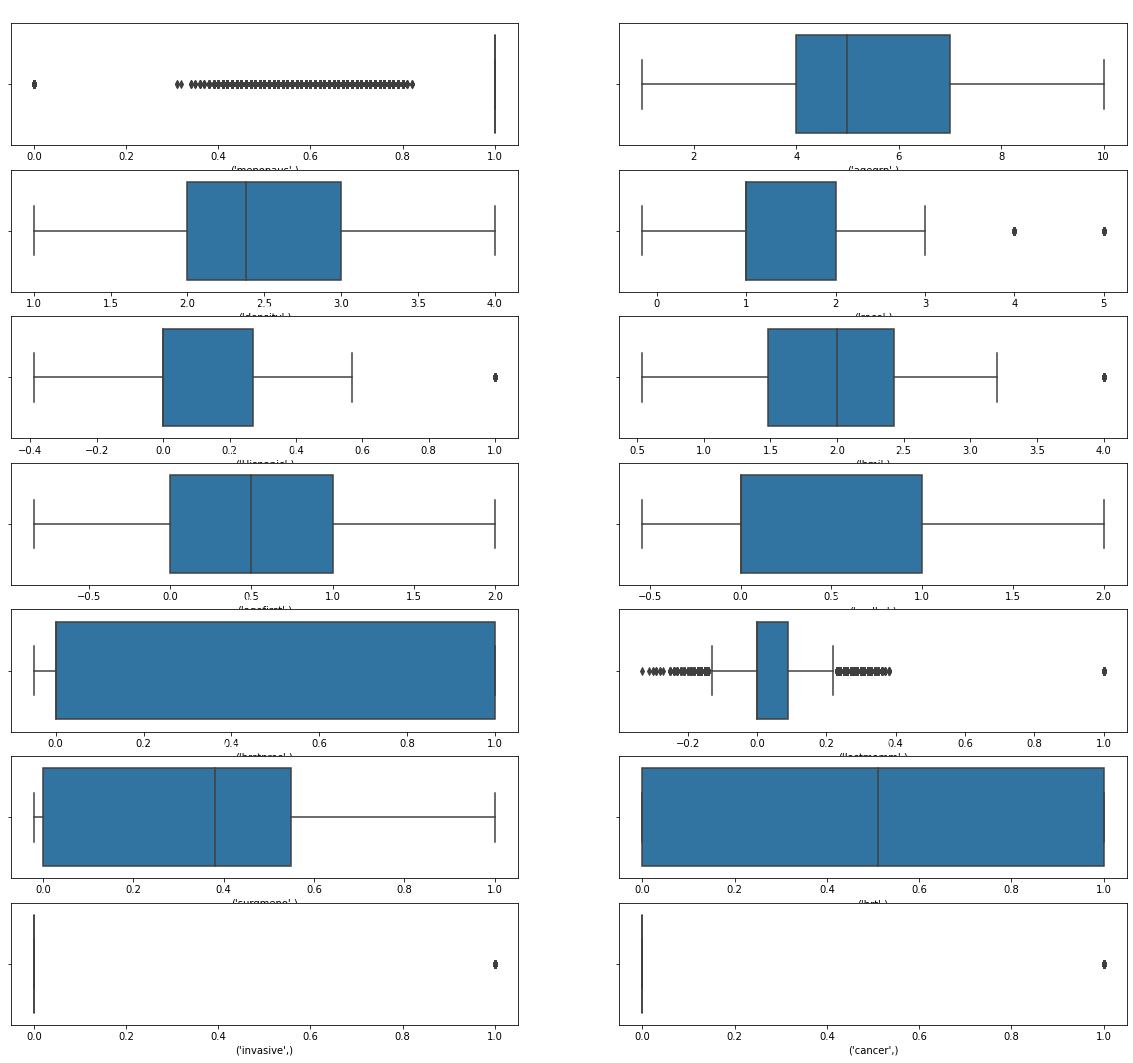

In [18]:
j=1
plt.figure(figsize=(20,40))
for i in df1.columns:
    plt.subplot(15,2,j)
    sns.boxplot(df1[i])
    plt.title(i,color='white')
    j=j+1

In [19]:
#checking imbalance or not
df1['cancer'].value_counts()

(cancer,)
0.0          189942
1.0            6520
dtype: int64

In [20]:
from imblearn.over_sampling import SMOTEN
smot = SMOTEN()
x_sm,y_sm = smot.fit_resample(df1.drop('cancer',axis=1),df1.cancer)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_16380\82636186.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_sm,y_sm = smot.fit_resample(df1.drop('cancer',axis=1),df1.cancer)


In [21]:
x_sm.shape , y_sm.shape

((379884, 13), (379884, 1))

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
g_svc=GridSearchCV(SVC(),{
    'C' : [1,2,3,,4,5,6,7,8,9,10],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
    })
g_svc.fit(x_sm,y_sm)
g_svc.best_params_

In [24]:
svc = SVC()
svc.fit(X_train,y_train) 

In [25]:
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred) 